In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
import seaborn as sns #a fancy plotting package
mpl.rcParams['figure.dpi'] = 400 #high res figures

# Exercise 15: Linear Decision Boundary of Logistic Regression

In [2]:
from numpy.random import default_rng
rg = default_rng(4)
X_1_pos = rg.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_1_neg = rg.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])
X_2_pos = rg.uniform(low=1, high=7, size=(20,1))
print(X_2_pos[0:3])
X_2_neg = rg.uniform(low=3, high=10, size=(20,1))
print(X_2_neg[0:3])

[[6.65833663]
 [4.06796532]
 [6.85746223]]
[[7.93405322]
 [9.59962575]
 [7.65960192]]
[[5.15531227]
 [5.6237829 ]
 [2.14473103]]
[[6.49784918]
 [9.69185251]
 [9.32236912]]


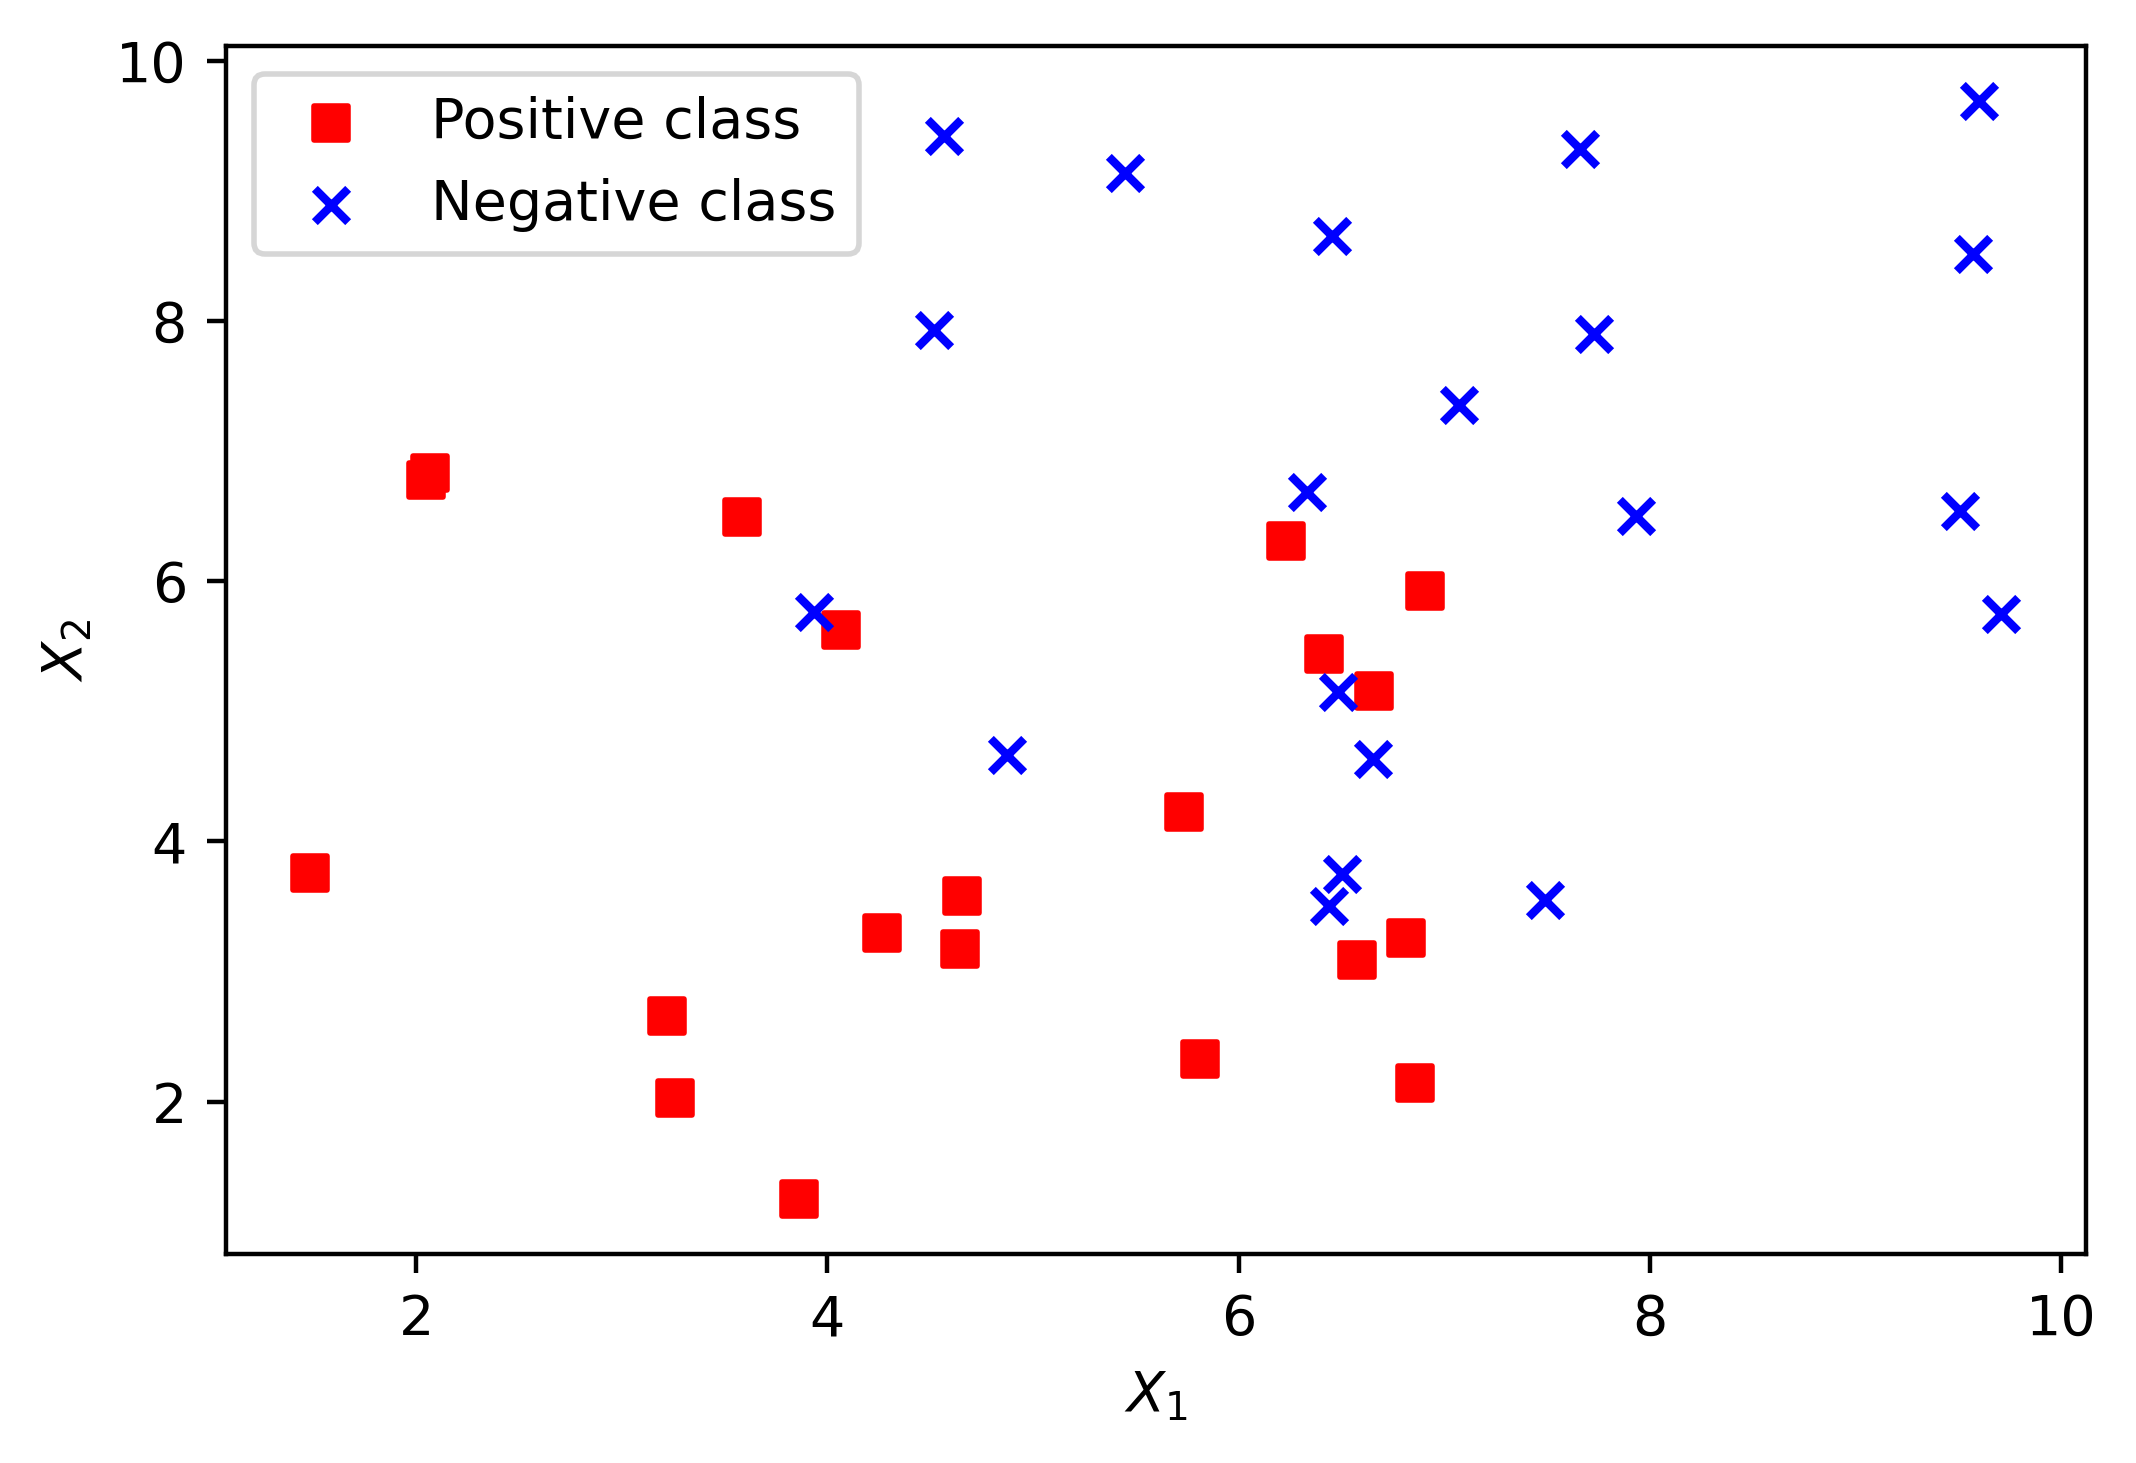

In [3]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='s')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class'])

In [4]:
X = np.block([[X_1_pos, X_2_pos], [X_1_neg, X_2_neg]])

In [5]:
print(X.shape)
print(X[0:3])

(40, 2)
[[6.65833663 5.15531227]
 [4.06796532 5.6237829 ]
 [6.85746223 2.14473103]]


In [6]:
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
print(y[0:5])
print(y[-5:])

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
example_lr = LogisticRegression(solver='liblinear')

In [9]:
example_lr

LogisticRegression(solver='liblinear')

In [10]:
example_lr.fit(X, y)

LogisticRegression(solver='liblinear')

In [11]:
y_pred = example_lr.predict(X)

In [12]:
positive_indices = [counter for counter in range(len(y_pred))
                    if y_pred[counter]==1]
negative_indices = [counter for counter in range(len(y_pred))
                    if y_pred[counter]==0]

In [13]:
positive_indices

[2, 3, 4, 5, 6, 7, 9, 11, 13, 15, 16, 17, 18, 19, 26, 34, 36]

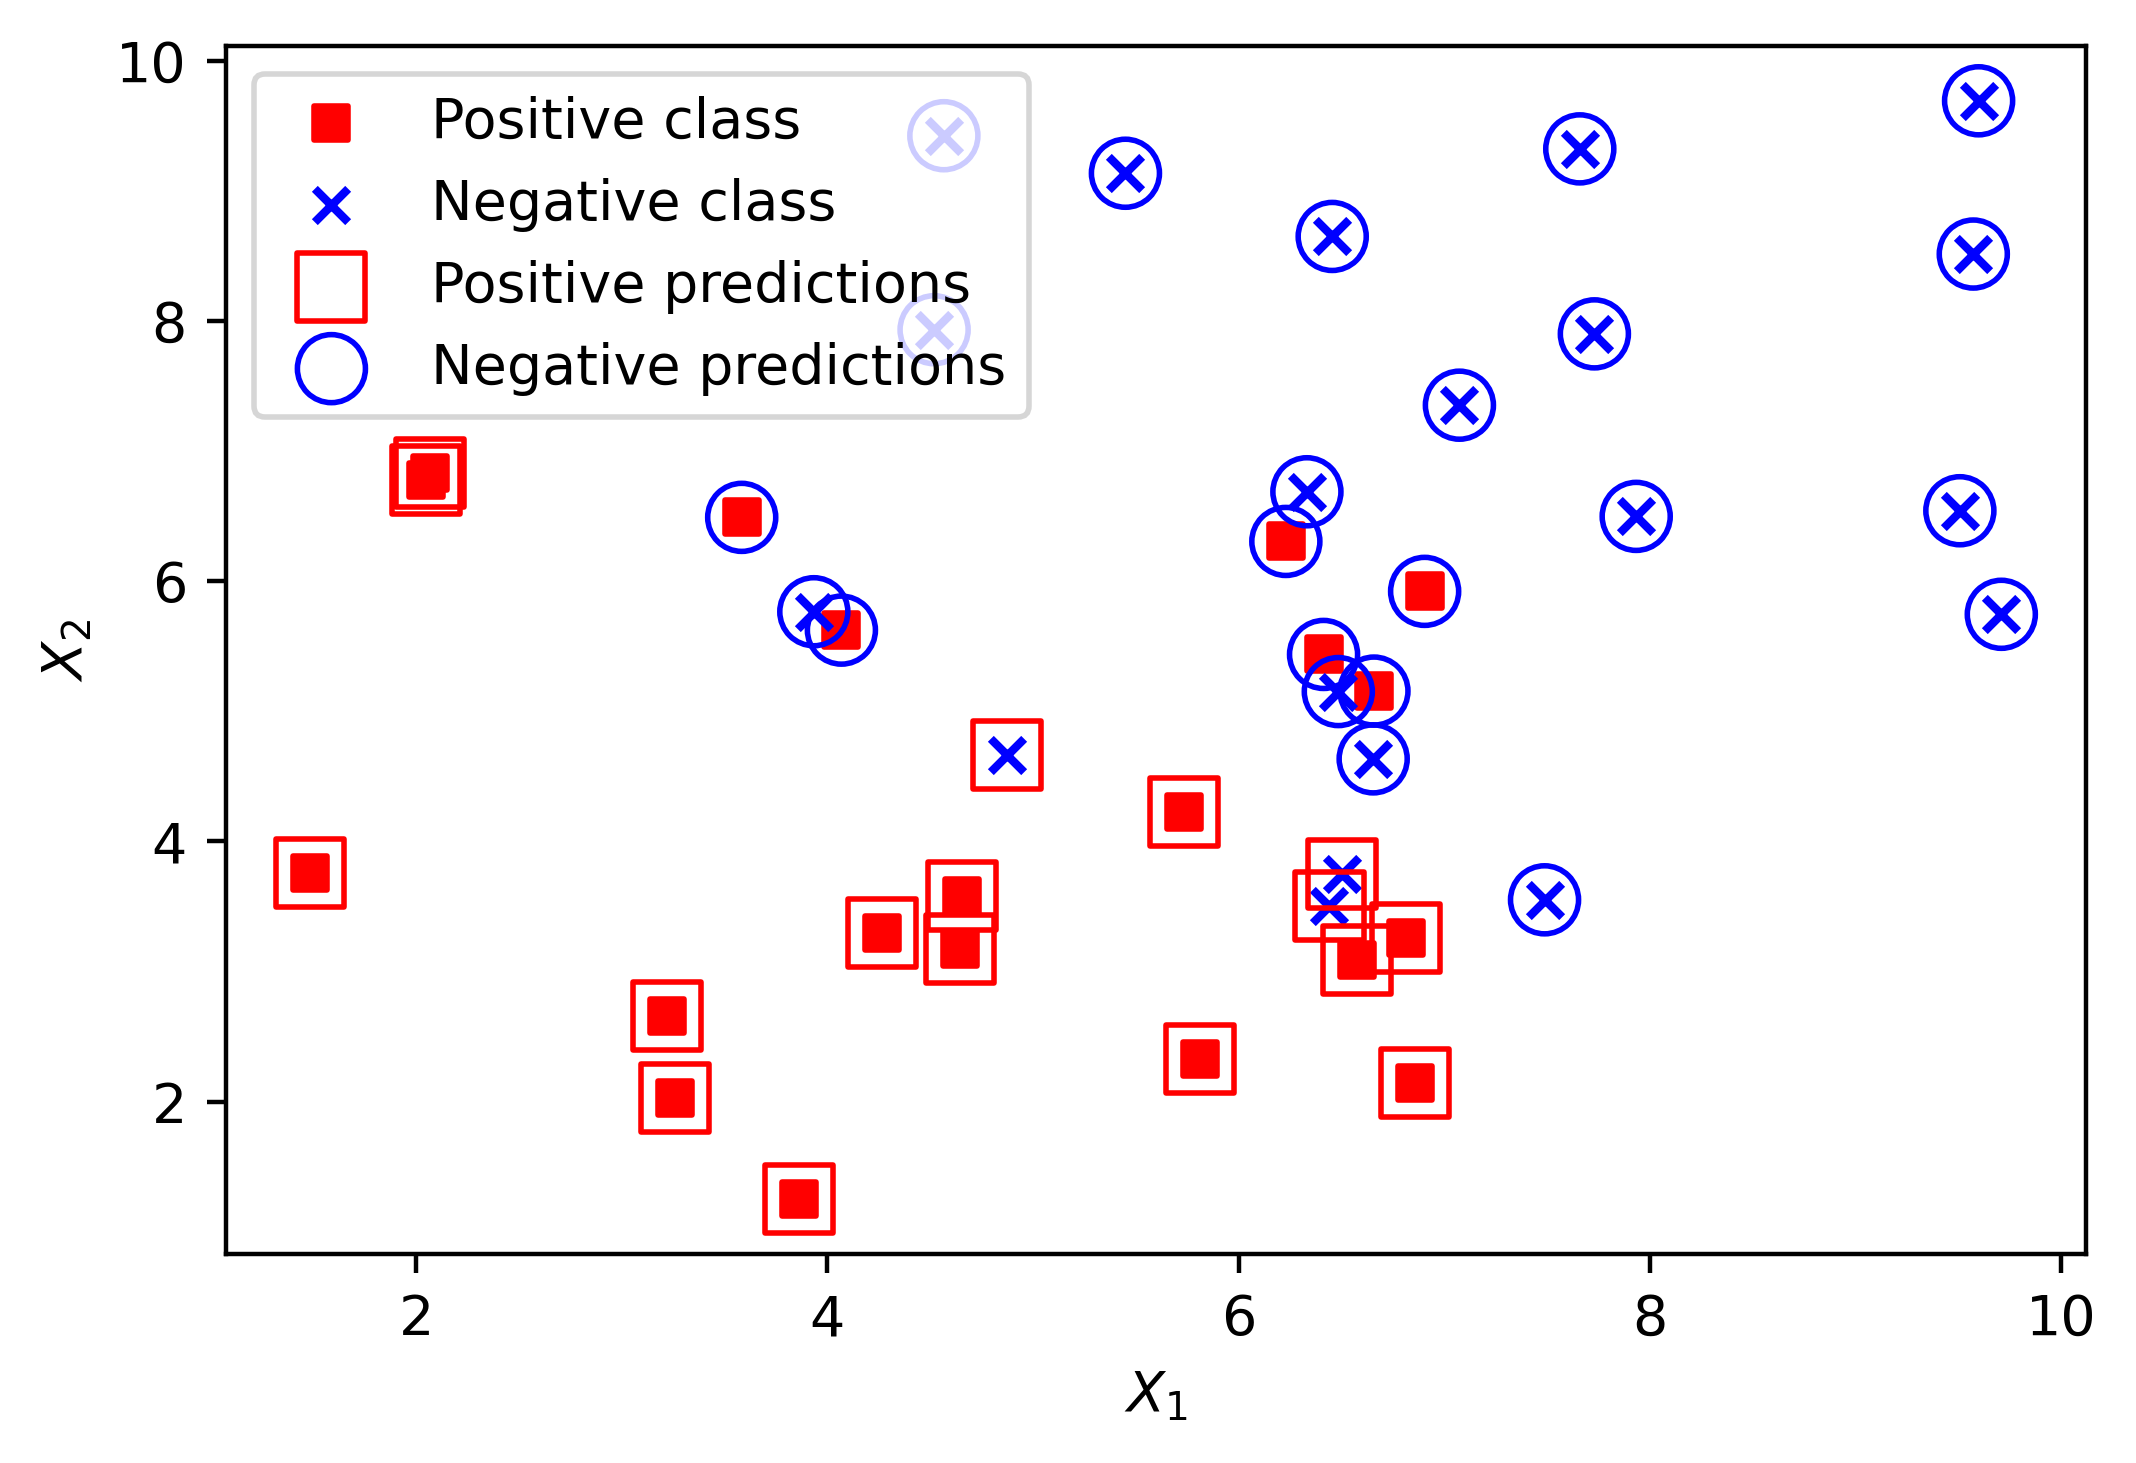

In [14]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='s')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.scatter(X[positive_indices,0], X[positive_indices,1],
            s=150, marker='s',
            edgecolors='red', facecolors='none')
plt.scatter(X[negative_indices,0], X[negative_indices,1],
            s=150, marker='o',
            edgecolors='blue', facecolors='none')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class',
            'Positive predictions', 'Negative predictions'])

$\theta_0 + \theta_1 X_1 + \theta_2 X_2 = 0$ is the equation for the decision boundary line, for a threshold of 0.5. Solving for "$y = mx + b$" form,

$X_2 = -\frac{\theta_1}{\theta_2}X_1 - \frac{\theta_0}{\theta_2}$

In [15]:
theta_1 = example_lr.coef_[0][0]
theta_2 = example_lr.coef_[0][1]
print(theta_1, theta_2)

-0.16472042583006558 -0.25675185949979507


In [16]:
example_lr.intercept_

array([2.11271726])

In [17]:
theta_0 = example_lr.intercept_

In [18]:
X_1_decision_boundary = np.array([0, 10])

In [19]:
X_2_decision_boundary = -(theta_1/theta_2)*X_1_decision_boundary\
    - (theta_0/theta_2)

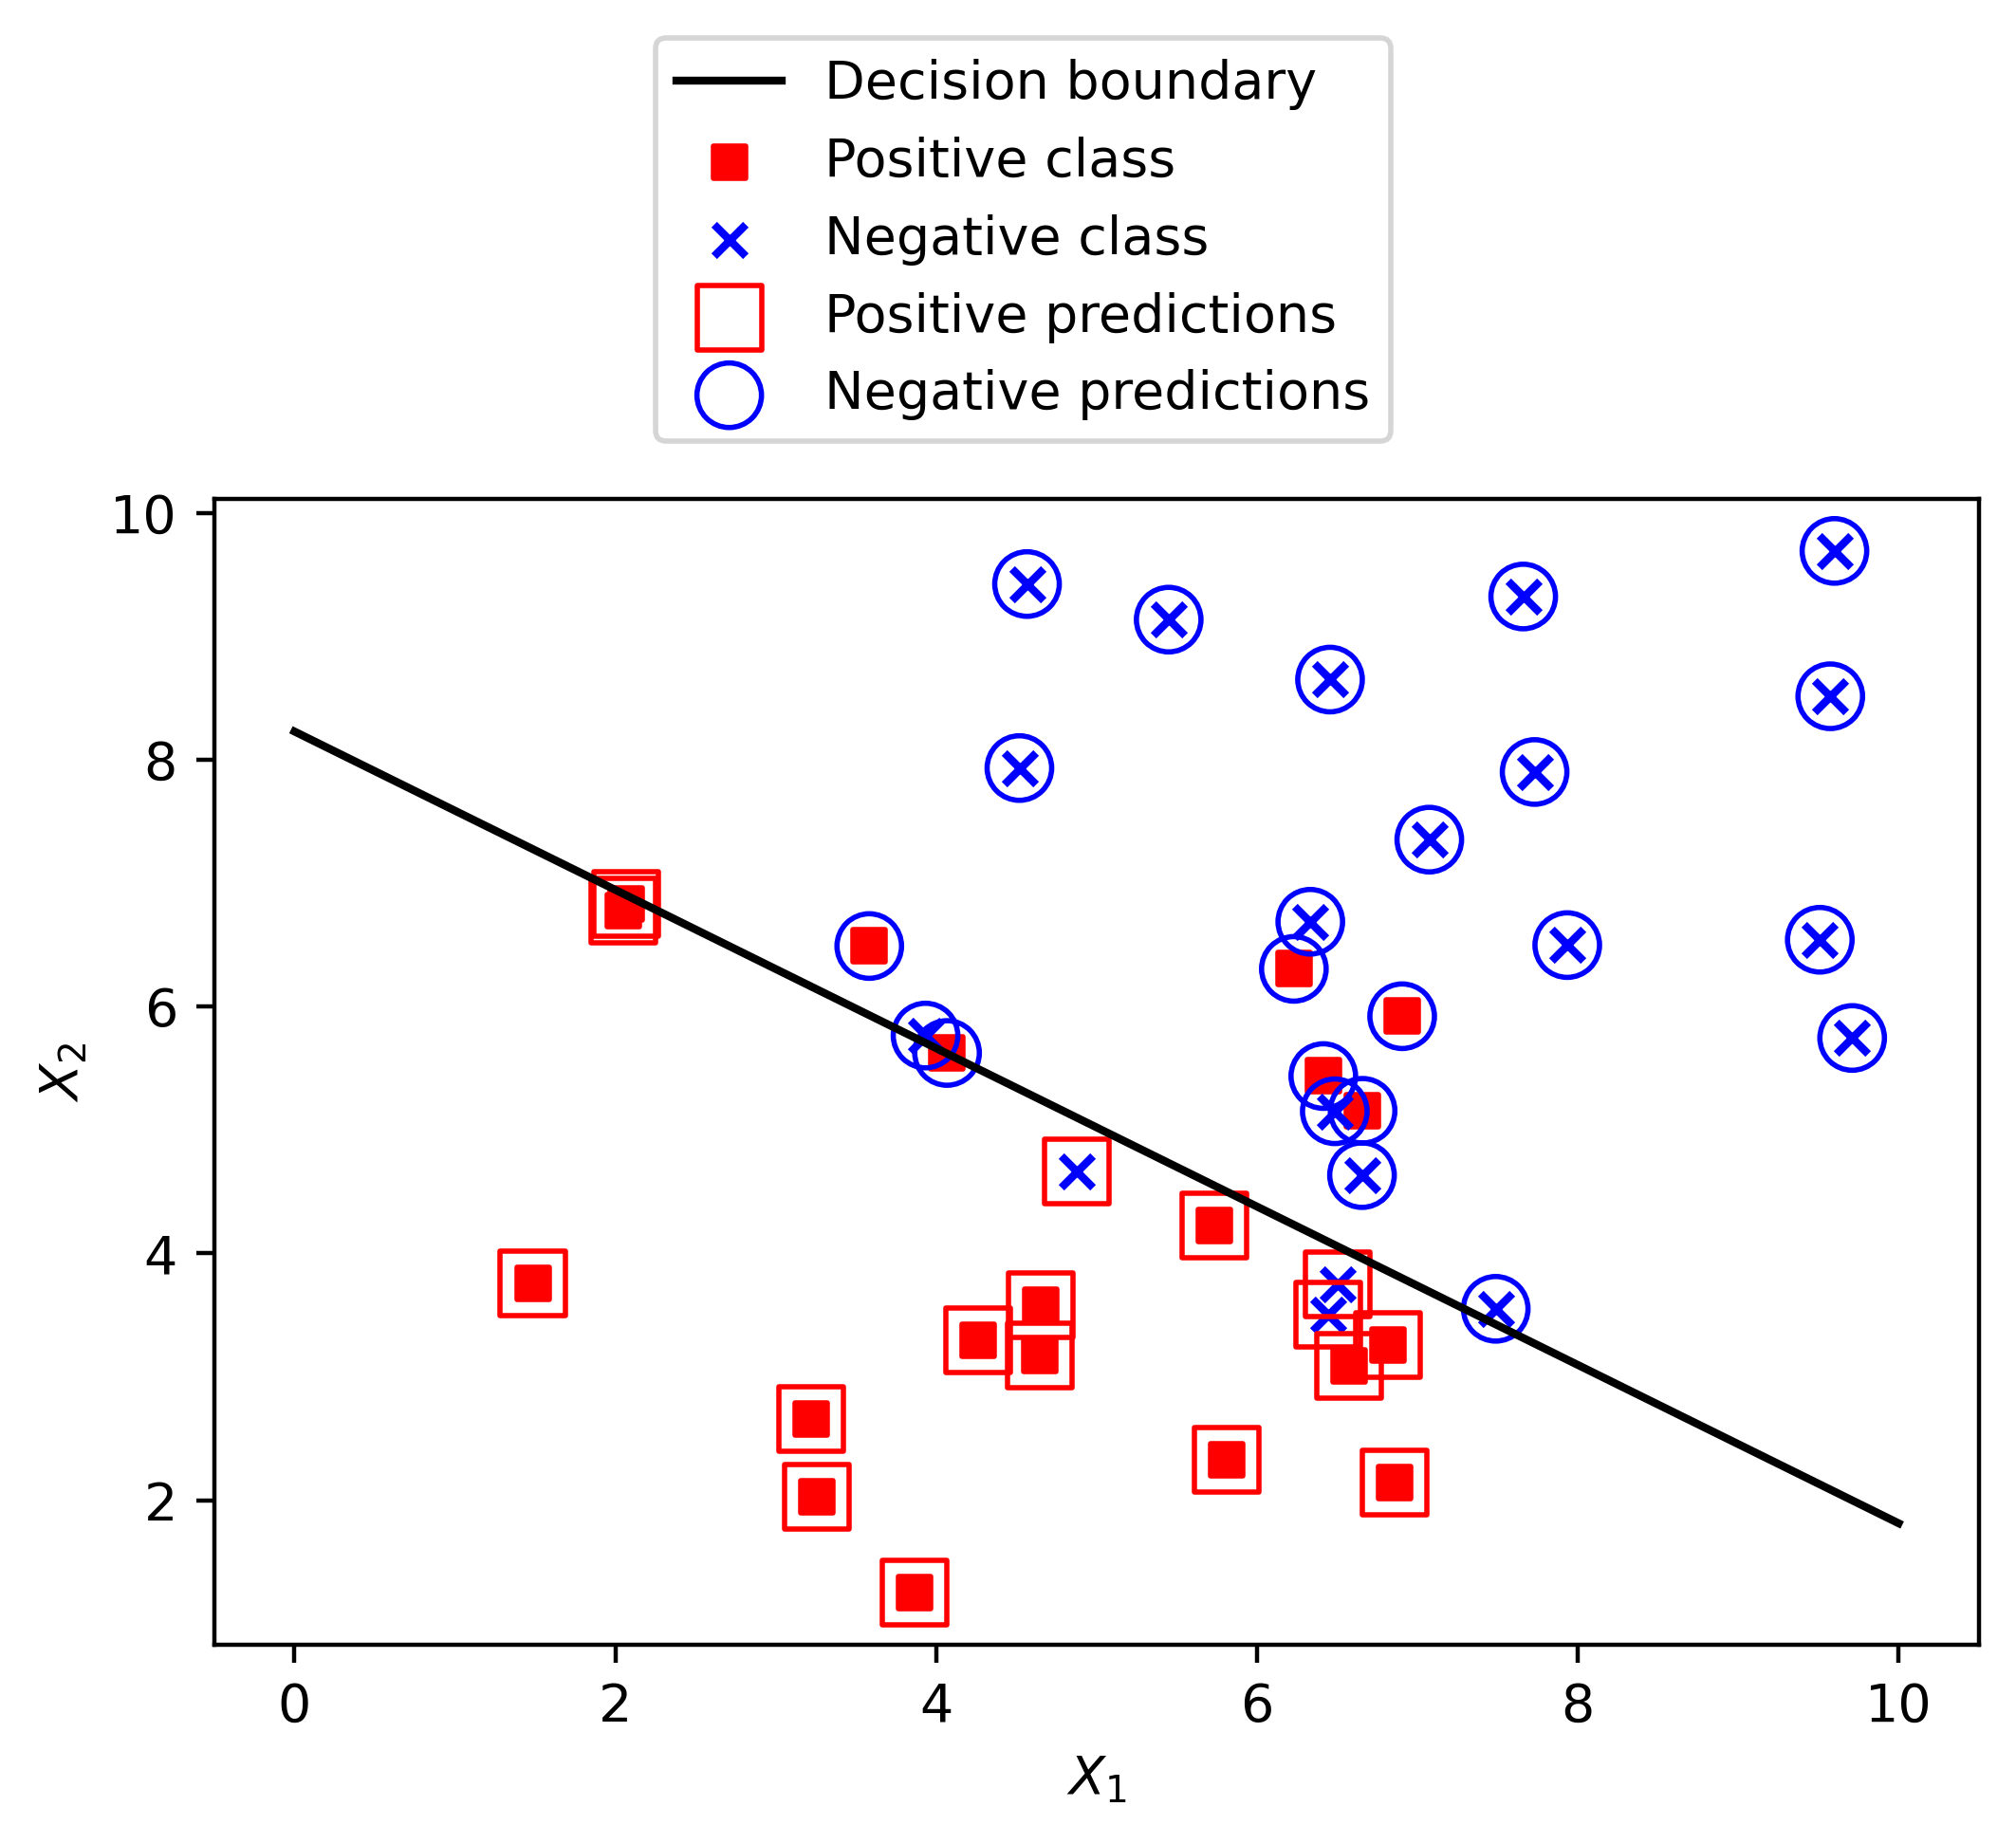

In [20]:
pos_true = plt.scatter(X_1_pos, X_2_pos,
                       color='red', marker='s',
                       label='Positive class')
neg_true = plt.scatter(X_1_neg, X_2_neg,
                       color='blue', marker='x',
                       label='Negative class')
pos_pred = plt.scatter(X[positive_indices,0],
                       X[positive_indices,1],
                       s=150, marker='s',
                       edgecolors='red', facecolors='none',
                       label='Positive predictions')
neg_pred = plt.scatter(X[negative_indices,0],
                       X[negative_indices,1],
                       s=150, marker='o',
                       edgecolors='blue', facecolors='none',
                       label='Negative predictions')
dec = plt.plot(X_1_decision_boundary, X_2_decision_boundary,
               'k-', label='Decision boundary')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(loc=[0.25, 1.05])